In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../datasets/Mall_Customers.csv')

In [3]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

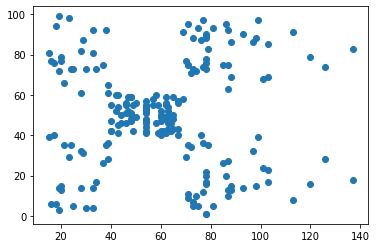

In [7]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])

In [8]:
from sklearn.cluster import KMeans

In [9]:
model = KMeans(n_clusters=5)
model.fit(X)

KMeans(n_clusters=5)

In [10]:
model.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

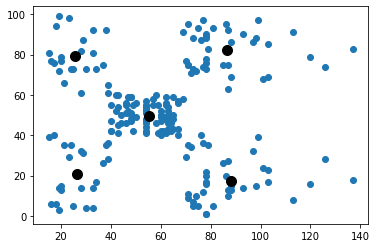

In [11]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='black',s=100)

In [13]:
yp = model.predict(X)

In [16]:
c0 = X[yp==0]
c1 = X[yp==1]
c2 = X[yp==2]
c3 = X[yp==3]
c4 = X[yp==4]

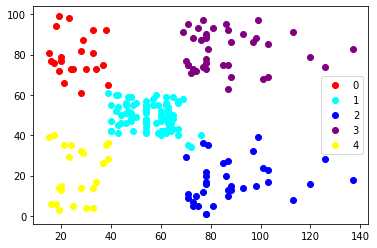

In [19]:
plt.scatter(c0['Annual Income (k$)'], c0['Spending Score (1-100)'],c='red', label='0')
plt.scatter(c1['Annual Income (k$)'], c1['Spending Score (1-100)'],c='cyan', label='1')
plt.scatter(c2['Annual Income (k$)'], c2['Spending Score (1-100)'],c='blue', label='2')
plt.scatter(c3['Annual Income (k$)'], c3['Spending Score (1-100)'],c='purple', label='3')
plt.scatter(c4['Annual Income (k$)'], c4['Spending Score (1-100)'],c='yellow', label='4')
plt.legend()

In [20]:
model.predict([[100,80]])

array([3])

In [21]:
model.inertia_

44448.45544793369

In [22]:
WCSS = []
for nc in range(1,11):
    model = KMeans(n_clusters=nc)
    model.fit(X)
    WCSS.append(model.inertia_)4

In [23]:
WCSS

[269981.28000000014,
 183257.8615446179,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37455.98455516028,
 30273.394312070028,
 25011.839349156595,
 21932.392044240973,
 19676.612585602812]

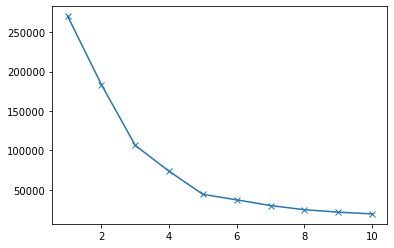

In [25]:
plt.plot(range(1,11), WCSS, marker='x')

In [ ]:
final_model = KMeans(n_clusters=5)